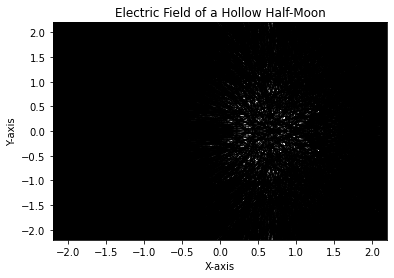

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 8.99e9  # Coulomb's constant

# Function to calculate electric field at a point (x, y)
def electric_field(x, y, charges):
    Ex, Ey = 0, 0
    for charge in charges:
        dx, dy = x - charge[0], y - charge[1]
        r = np.sqrt(dx**2 + dy**2)
        if r != 0:
            Ex += k * charge[2] * dx / r**3
            Ey += k * charge[2] * dy / r**3
    return Ex, Ey

# Function to simulate electric field of a hollow half-moon
def simulate_hollow_half_moon(radius_outer, radius_inner, num_points_theta, num_points_phi):
    charges = []
    for theta in np.linspace(0, np.pi, num_points_theta):
        for phi in np.linspace(0, np.pi, num_points_phi):
            x = (radius_outer + radius_inner * np.cos(phi)) * np.sin(theta)
            y = (radius_outer + radius_inner * np.cos(phi)) * np.cos(theta)
            charges.append((x, y, np.sin(phi) * np.sin(theta)))

    return charges

# Define parameters
radius_outer = 1.0
radius_inner = 0.7
num_points_theta = 50
num_points_phi = 50

# Simulate electric field
charges = simulate_hollow_half_moon(radius_outer, radius_inner, num_points_theta, num_points_phi)

# Define grid for visualization
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate electric field at each point in the grid
Ex, Ey = np.zeros_like(X), np.zeros_like(Y)
for i in range(len(x)):
    for j in range(len(y)):
        Ex[i, j], Ey[i, j] = electric_field(X[i, j], Y[i, j], charges)

# Plot the electric field vectors
plt.quiver(X, Y, Ex, Ey, scale=20, scale_units='xy', angles='xy')
plt.title('Electric Field of a Hollow Half-Moon')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
